### MAST30034: Applied Data Science Project 1
---
# Data Analysis: Modelling Average Trip Rates Over Time
#### Xavier Travers (1178369)

TODO: Modelling Average Trip Rates Over Time

In [1]:
# imports used throughout this notebook
from collections import defaultdict
from itertools import product
import os
import sys
from pyspark.sql import DataFrame, Column
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
import geopandas

# add homemade helpers
sys.path.insert(1, '../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

# for printouts
DEBUGGING = False

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName('MAST30034 XT Project 1')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.sql.repl.eagerEval.enabled', True) 
    .config('spark.sql.parquet.cacheMetadata', 'true')
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/14 21:06:04 WARN Utils: Your hostname, Polaris resolves to a loopback address: 127.0.1.1; using 172.22.173.58 instead (on interface eth0)
22/08/14 21:06:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/14 21:06:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/14 21:06:06 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/14 21:06:06 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


### Grouped by Pick-Up Location

In [3]:
# read in the aggregated tlc by pickup data
tlc_pu_df = spark.read.parquet('../data/curated/tlc/aggregated/yellow/by_pu')
tlc_pu_df.limit(5)

week_year,week_month,week_ending,week_index,timeline,pu_borough,population,num_*,num_pc_*,num_p100k_*,avg_passengers,avg_trip_distance
2020,8,2020-08-22,138,post,Manhattan,1687834.0,198601,0.11766619229142203,11766.619229142203,1.417903233115644,2.2355266086273304
2020,6,2020-06-27,130,post,Brooklyn,2727393.0,1414,5.184438032949414E-4,51.844380329494136,1.275106082036775,3.278769448373408
2021,1,2021-01-23,160,post,Bronx,1424948.0,656,4.603676765748645E-4,46.03676765748645,1.3551829268292683,4.057804878048782
2020,4,2020-04-25,121,post,Staten Island,495522.0,15,3.027110804363883E-5,3.027110804363883,1.1333333333333333,10.399333333333335
2021,1,2021-01-16,159,post,Queens,2331143.0,12912,0.005538913743172341,553.8913743172341,1.4331629491945477,10.967754801734872


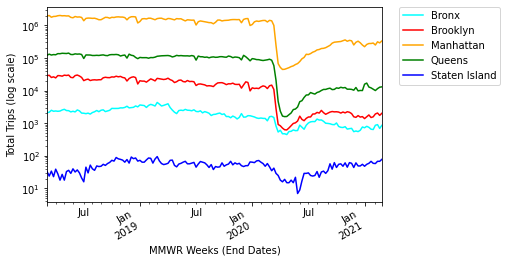

In [4]:
# generate a time series graph of daily avg trips vs week index.
ph.time_series(tlc_pu_df.toPandas(), 'num_*', 'pu_borough', 
    ylabel = 'Total Trips', logy = True)

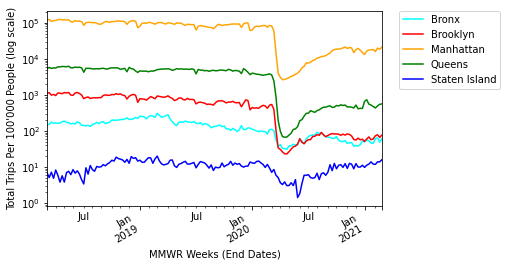

In [5]:
# generate a time series graph of daily avg trips vs week index.
ph.time_series(tlc_pu_df.toPandas(), 'num_p100k_*', 'pu_borough', 
    ylabel = 'Total Trips Per 100\'000 People', logy = True)

### Grouped by Drop-Off Location

In [6]:
# read in the aggregated tlc by dropoff data
tlc_do_df = spark.read.parquet('../data/curated/tlc/aggregated/yellow/by_do')
tlc_do_df.limit(5)

week_year,week_month,week_ending,week_index,timeline,do_borough,population,num_*,num_pc_*,num_p100k_*,avg_passengers,avg_trip_distance
2020,8,2020-08-22,138,post,Manhattan,1687834.0,191363,0.11337785587919191,11337.78558791919,1.4197990207093325,2.188315870884099
2020,6,2020-06-27,130,post,Brooklyn,2727393.0,5994,0.002197703081294...,219.7703081294115,1.3450116783450117,7.2298214881548235
2021,1,2021-01-23,160,post,Bronx,1424948.0,3283,0.002303943722858659,230.39437228586587,1.420651842826683,8.226576302162657
2020,4,2020-04-25,121,post,Staten Island,495522.0,22,4.439762513067028E-5,4.439762513067028,1.1363636363636365,12.559090909090907
2021,1,2021-01-16,159,post,Queens,2331143.0,9486,0.00406924843306481,406.92484330648097,1.4024878768711786,6.549929369597306


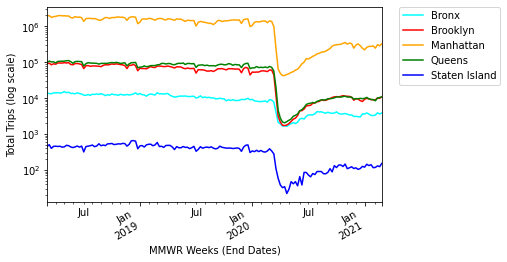

In [7]:
# generate a time series graph of daily avg trips vs week index.
ph.time_series(tlc_do_df.toPandas(), 'num_*', 'do_borough', 
    ylabel = 'Total Trips', logy = True)

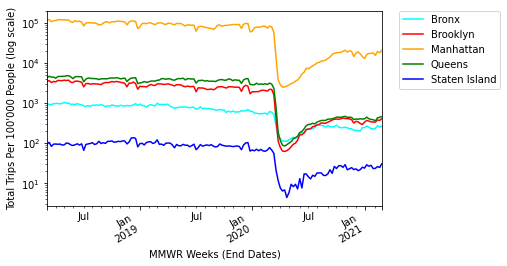

In [8]:
# generate a time series graph of daily avg trips vs week index.
ph.time_series(tlc_do_df.toPandas(), 'num_p100k_*', 'do_borough', 
    ylabel = 'Total Trips Per 100\'000 People', logy = True)